<a target="_blank" href="https://colab.research.google.com/github/Ganymede-Bio/bio-curve-fit/blob/main/examples/five_pl_logistic/five_pl_fit.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
! pip install bio-curve-fit

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from bio_curve_fit.logistic import FourParamLogistic
from bio_curve_fit.plotting import plot_standard_curve_figure

# set a seed for reproducibility
np.random.seed(42)

It's common to want to find the region of a 4PL that behaves more or less "linearly". This is useful for example when you want to find the region of the curve that is most sensitive to changes in the input.

In `bio-curve-fit` we implement the method from  [Sebaugh and McCray (2003)](https://onlinelibrary.wiley.com/doi/10.1002/pst.62) which works well when the curve is plotted in a log-linear (semi-log) scale (i.e. the x-axis is in log scale, y-axis on a linear scale).

This method doesn't work as well for curves plotted in a log-log scale where standards have not come close to reaching saturation.

In [6]:
def plot_curves(standards_data, params, plate_number):
    """Help to plot the standard curve and the linear range of the fitted curve."""
    model = FourParamLogistic(**params)

    # Key function call: `semi_log_linear_range_of_response` returns the linear range of the fitted curve
    linear_range_ys = list(model.semi_log_linear_range_of_response())
    concentration = standards_data["Concentration"]
    response = standards_data["Response"]
    c_x = model.get_params()["C"]
    c_y = model.predict(c_x)

    # If the linear range of the fitted curve is outside the range of the standards, use the extrema of the data
    # as the limits instead
    if linear_range_ys[1] > max(response):
        linear_range_ys[1] = max(response)
    if linear_range_ys[0] < min(response):
        linear_range_ys[0] = min(response)

    linear_range_xs = model.predict_inverse(pd.Series(linear_range_ys))

    # Show or save the updated figure
    plt.show()  # Or you can save it using fig.savefig()

    fig, ax = plot_standard_curve_figure(
        concentration, None, model, title=f"Plate {plate_number}"
    )  # type: ignore
    ax.scatter(concentration, response, label="Standards")
    ax.scatter(c_x, c_y, label="C: Midpoint", color="purple", marker="x")
    ax.set_yscale("linear")

    for x, y in zip(linear_range_xs, linear_range_ys):
        ax.text(x, y, f"x={x:.2f}, y={y:.2f})", fontsize=13, ha="right")

    ax.hlines(
        linear_range_ys,
        0,
        max(concentration),
        color="green",
        linestyle="--",
        label="Linear Range",
    )
    ax.legend()
    # Show or save the updated figure
    plt.show()  # Or you can save it using fig.savefig()

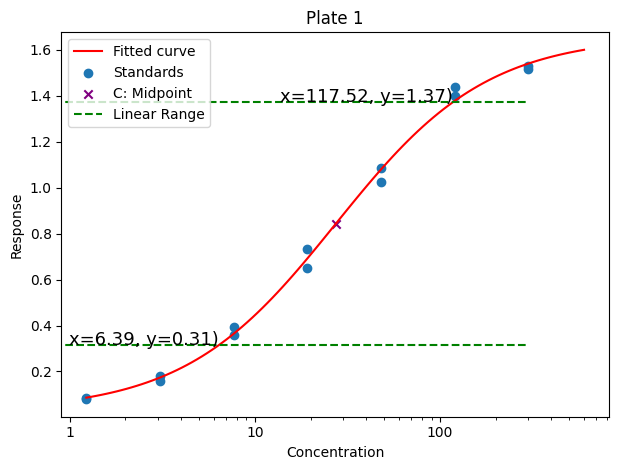

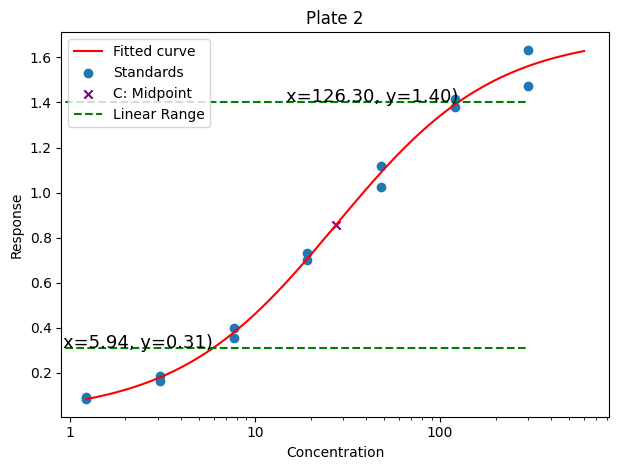

In [7]:
df_1 = pd.DataFrame(
    {
        "Concentration": [
            300,
            300,
            120,
            120,
            48,
            48,
            19.2,
            19.2,
            7.68,
            7.68,
            3.072,
            3.072,
            1.2288,
            1.2288,
        ],
        "Response": [
            1.515,
            1.531,
            1.438,
            1.401,
            1.023,
            1.085,
            0.649,
            0.735,
            0.36,
            0.394,
            0.16,
            0.179,
            0.079,
            0.086,
        ],
    }
)

df_2 = pd.DataFrame(
    {
        "Concentration": [
            300,
            300,
            120,
            120,
            48,
            48,
            19.2,
            19.2,
            7.68,
            7.68,
            3.072,
            3.072,
            1.2288,
            1.2288,
        ],
        "Response": [
            1.474,
            1.634,
            1.417,
            1.38,
            1.025,
            1.116,
            0.7,
            0.733,
            0.356,
            0.397,
            0.161,
            0.184,
            0.082,
            0.092,
        ],
    }
)
params_1 = {"A": 0.0273, "B": 1.06, "C": 27.4, "D": 1.66}
params_2 = {"A": 0.0123, "B": 1.01, "C": 27.4, "D": 1.7}

plot_curves(df_1, params_1, plate_number="1")
plot_curves(df_2, params_2, plate_number="2")

For these curves where the standards don't come near to saturating the curve, the linear region calculated by `semi_log_linear_range_of_response` doesn't make as much sense.

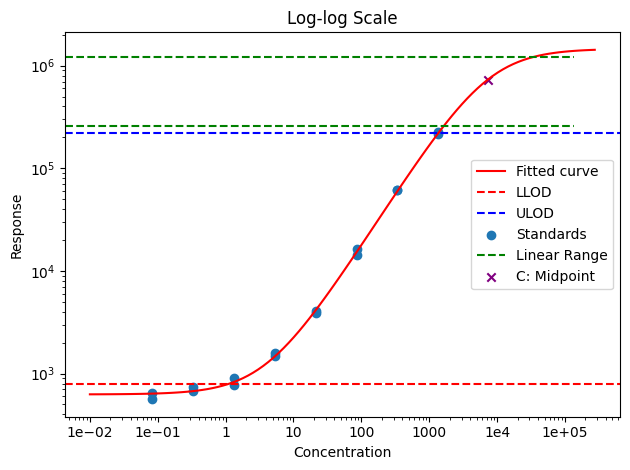

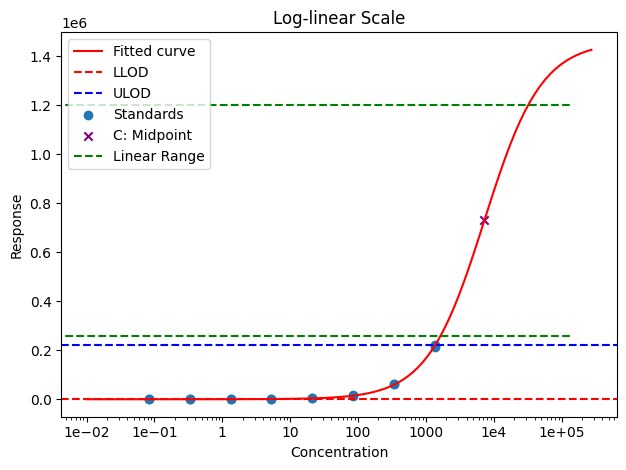

In [8]:
response = pd.Series(
    [
        223747,
        214105,
        61193,
        61831,
        16290,
        14151,
        4097,
        3895,
        1587,
        1485,
        896,
        771,
        743,
        674,
        653,
        562,
        634,
        642,
    ]
)

concentration = pd.Series(
    [
        1360,
        1360,
        340,
        340,
        85,
        85,
        21.25,
        21.25,
        5.3125,
        5.3125,
        1.328125,
        1.328125,
        0.33203125,
        0.33203125,
        0.0830078125,
        0.0830078125,
        0.0,
        0.0,
    ]
)

model = FourParamLogistic().fit(
    concentration,
    response,
    weight_func=FourParamLogistic.inverse_variance_weight_function,
)
ys = model.semi_log_linear_range_of_response()
c_x = model.get_params()["C"]
c_y = model.predict(c_x)

# extend the x-range
lin_x = np.linspace(
    min(concentration), max(concentration) + max(concentration) * 100, 1000
)
lin_y = model.tangent_line_at_midpoint(lin_x)

fig, ax = plot_standard_curve_figure(lin_x, None, model, title="Log-log Scale")  # type: ignore
ax.scatter(concentration, response, label="Standards")
ax.hlines(ys, 0, max(lin_x), color="green", linestyle="--", label="Linear Range")

ax.scatter(c_x, c_y, label="C: Midpoint", color="purple", marker="x")
ax.legend()

# Show or save the updated figure
plt.show()  # Or you can save it using fig.savefig()

fig, ax = plot_standard_curve_figure(lin_x, None, model, title="Log-linear Scale")  # type: ignore
ax.scatter(concentration, response, label="Standards")
ax.scatter(c_x, c_y, label="C: Midpoint", color="purple", marker="x")
ax.set_yscale("linear")
ax.hlines(ys, 0, max(lin_x), color="green", linestyle="--", label="Linear Range")
ax.legend()

# Show or save the updated figure
plt.show()  # Or you can save it using fig.savefig()